# 0. Khai báo các thư viện cần thiết

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Đọc dữ liệu từ file CSV

In [2]:
df = pd.read_csv("https://s3.ap-southeast-1.amazonaws.com/learn.codegym.vn/media/public/2022/01/20125029/shopeep_koreantop_clothing_shop_data.csv", encoding = "ISO-8859-1")
df.head()

,pk_shop,date_collected,shopid,name,join_month,join_day,join_year,item_count,follower_count,response_time,response_rate,shop_location,rating_bad,rating_good,rating_normal,rating_star,is_shopee_verified,is_official_shop
0,20210613254711738,2021-06-13,254711738,hello.may.ph,April,27,2020,446,17487,10:13:55,96,NaN,181,17510,729,4.81,1,0
1,20210613314198143,2021-06-13,314198143,love.women.shop,September,25,2020,263,8574,10:43:05,73,"San Nicolas,Metro Manila",78,2656,198,4.68,0,0
2,2021061310377223,2021-06-13,10377223,R&O RedOrange,September,27,2016,209,660417,08:32:07,90,"Pasay City,Metro Manila",4647,1071829,18073,4.91,1,0
3,2021061321407329,2021-06-13,21407329,patriciacai,April,30,2017,165,18787,09:10:38,94,"Binondo,Metro Manila",44,18959,215,4.94,1,0
4,2021061311187885,2021-06-13,11187885,Little Market Manila,October,18,2016,467,67371,11:40:59,89,"Caloocan City,Metro Manila",680,39252,2383,4.73,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746 entries, 0 to 745
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   pk_shop             746 non-null    int64  
 1   date_collected      746 non-null    object 
 2   shopid              746 non-null    int64  
 3   name                746 non-null    object 
 4   join_month          746 non-null    object 
 5   join_day            746 non-null    int64  
 6   join_year           746 non-null    int64  
 7   item_count          746 non-null    int64  
 8   follower_count      746 non-null    int64  
 9   response_time       746 non-null    object 
 10  response_rate       746 non-null    int64  
 11  shop_location       428 non-null    object 
 12  rating_bad          746 non-null    int64  
 13  rating_good         746 non-null    int64  
 14  rating_normal       746 non-null    int64  
 15  rating_star         740 non-null    float64
 16  is_shope

In [4]:
df.join_month.unique()

array(['April', 'September', 'October', 'February', 'May', 'December',
       'November', 'July', 'March', 'August', 'January', 'June'],
      dtype=object)

In [5]:
# chuyển đối tháng sang dạng số
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
numbers = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

df.join_month.replace(months, numbers, inplace = True)

df.head()

,pk_shop,date_collected,shopid,name,join_month,join_day,join_year,item_count,follower_count,response_time,response_rate,shop_location,rating_bad,rating_good,rating_normal,rating_star,is_shopee_verified,is_official_shop
0,20210613254711738,2021-06-13,254711738,hello.may.ph,4,27,2020,446,17487,10:13:55,96,NaN,181,17510,729,4.81,1,0
1,20210613314198143,2021-06-13,314198143,love.women.shop,9,25,2020,263,8574,10:43:05,73,"San Nicolas,Metro Manila",78,2656,198,4.68,0,0
2,2021061310377223,2021-06-13,10377223,R&O RedOrange,9,27,2016,209,660417,08:32:07,90,"Pasay City,Metro Manila",4647,1071829,18073,4.91,1,0
3,2021061321407329,2021-06-13,21407329,patriciacai,4,30,2017,165,18787,09:10:38,94,"Binondo,Metro Manila",44,18959,215,4.94,1,0
4,2021061311187885,2021-06-13,11187885,Little Market Manila,10,18,2016,467,67371,11:40:59,89,"Caloocan City,Metro Manila",680,39252,2383,4.73,1,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746 entries, 0 to 745
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   pk_shop             746 non-null    int64  
 1   date_collected      746 non-null    object 
 2   shopid              746 non-null    int64  
 3   name                746 non-null    object 
 4   join_month          746 non-null    int64  
 5   join_day            746 non-null    int64  
 6   join_year           746 non-null    int64  
 7   item_count          746 non-null    int64  
 8   follower_count      746 non-null    int64  
 9   response_time       746 non-null    object 
 10  response_rate       746 non-null    int64  
 11  shop_location       428 non-null    object 
 12  rating_bad          746 non-null    int64  
 13  rating_good         746 non-null    int64  
 14  rating_normal       746 non-null    int64  
 15  rating_star         740 non-null    float64
 16  is_shope

# 2. Vẽ biểu đồ:
- So sánh số lượng shop gia nhập theo các năm.
- Xu hướng của số lượng shop gia nhập theo từng tháng trong từng năm.

In [7]:
df.join_year.unique()

array([2020, 2016, 2017, 2021, 2019, 2018, 2015], dtype=int64)

In [8]:
df.join_month.unique()

array([ 4,  9, 10,  2,  5, 12, 11,  7,  3,  8,  1,  6], dtype=int64)

In [9]:
# Lấy ra dữ liệu số lượng shop gia nhập theo năm
df1 = df.drop_duplicates(subset = ["shopid"], keep = "first")
df1.reset_index(drop = True, inplace = True)

temp = df1.groupby(["join_year"]).count()
temp.reset_index(inplace = True)
temp

,join_year,pk_shop,date_collected,shopid,name,join_month,join_day,item_count,follower_count,response_time,response_rate,shop_location,rating_bad,rating_good,rating_normal,rating_star,is_shopee_verified,is_official_shop
0,2015,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,2016,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11
2,2017,72,72,72,72,72,72,72,72,72,72,61,72,72,72,72,72,72
3,2018,48,48,48,48,48,48,48,48,48,48,38,48,48,48,48,48,48
4,2019,53,53,53,53,53,53,53,53,53,53,34,53,53,53,53,53,53
5,2020,130,130,130,130,130,130,130,130,130,130,43,130,130,130,130,130,130
6,2021,72,72,72,72,72,72,72,72,72,72,25,72,72,72,66,72,72


In [10]:
# Lấy ra dữ liệu số lượng shop gia nhập theo từng tháng trong từng năm
temp_2 = df1.groupby(["join_year", "join_month"]).count()
temp_2.reset_index(inplace = True)
temp_2017 = temp_2[temp_2.join_year == 2017]
temp_2018 = temp_2[temp_2.join_year == 2018]
temp_2019 = temp_2[temp_2.join_year == 2019]
temp_2020 = temp_2[temp_2.join_year == 2020]
temp_2021 = temp_2[temp_2.join_year == 2021]

temp_2021

,join_year,join_month,pk_shop,date_collected,shopid,name,join_day,item_count,follower_count,response_time,response_rate,shop_location,rating_bad,rating_good,rating_normal,rating_star,is_shopee_verified,is_official_shop
53,2021,1,11,11,11,11,11,11,11,11,11,5,11,11,11,11,11,11
54,2021,2,9,9,9,9,9,9,9,9,9,5,9,9,9,9,9,9
55,2021,3,17,17,17,17,17,17,17,17,17,6,17,17,17,16,17,17
56,2021,4,15,15,15,15,15,15,15,15,15,2,15,15,15,15,15,15
57,2021,5,15,15,15,15,15,15,15,15,15,5,15,15,15,12,15,15
58,2021,6,5,5,5,5,5,5,5,5,5,2,5,5,5,3,5,5


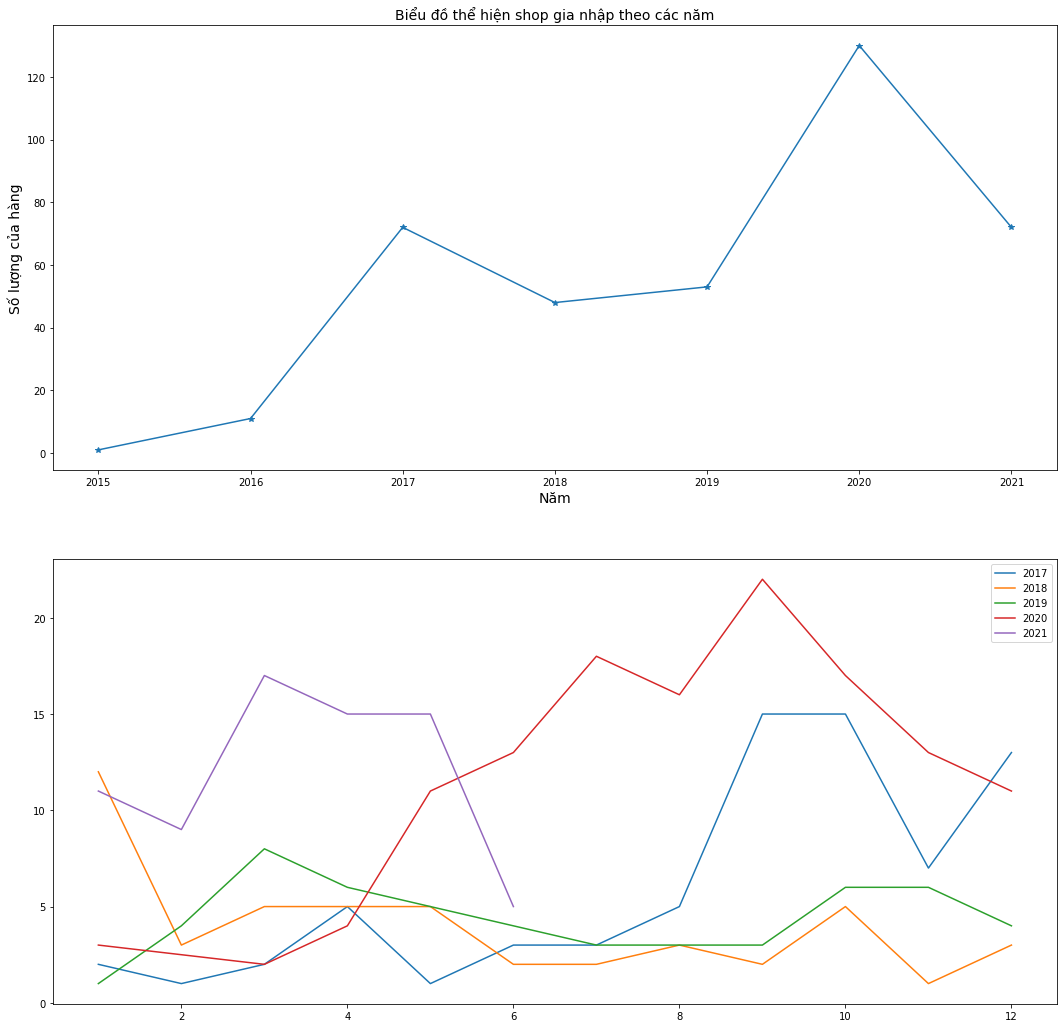

In [11]:
# Chia đồ thị thành 6 phần
fig, ax = plt.subplots(2, 1)
fig.set_figheight(18)
fig.set_figwidth(18)

# Vẽ số lượng shop gia nhập theo các năm
ax[0].plot(temp.join_year, temp.shopid, marker = "*")
ax[0].set_title("Biểu đồ thể hiện shop gia nhập theo các năm", fontsize = 14)
ax[0].set_xlabel("Năm", fontsize = 14)
ax[0].set_ylabel("Số lượng của hàng", fontsize = 14)

# Vẽ số lượng shop gia nhập theo từng tháng trong từng năm (2017-2021)
ax[1].plot(temp_2017.join_month, temp_2017.shopid, label = "2017")
ax[1].plot(temp_2018.join_month, temp_2018.shopid, label = "2018")
ax[1].plot(temp_2019.join_month, temp_2019.shopid, label = "2019")
ax[1].plot(temp_2020.join_month, temp_2020.shopid, label = "2020")
ax[1].plot(temp_2021.join_month, temp_2021.shopid, label = "2021")
ax[1].legend()


plt.show()

# 3. Vẽ biểu đồ thể hiện mối quan hệ giữa 
- Tỉ lệ phản hồi với số lượt khách hàng đánh giá tốt
- Thời gian phản hồi (đơn vị giây) với số lượt khách hàng đánh giá tốt.

In [12]:
# Lấy ra dataframe chỉ chứa "response_rate" và "rating_good"
df3 = df.loc[:, ["response_rate", "rating_good"]]
df3

,response_rate,rating_good
0,96,17510
1,73,2656
2,90,1071829
3,94,18959
4,89,39252
...,...,...
741,86,32
742,91,9
743,96,463
744,73,103289


In [13]:
# Lấy ra dataframe chỉ chứa "response_time" và "rating_bad"
df4 = df.loc[:, ["response_time", "rating_good"]]
df4.response_time = pd.to_datetime(df4.response_time, format=' %H:%M:%S')
df4["total_seconds"] = df4.response_time.dt.second + df4.response_time.dt.minute * 60 + df4.response_time.dt.hour * 3600
df4.head()

,response_time,rating_good,total_seconds
0,1900-01-01 10:13:55,17510,36835
1,1900-01-01 10:43:05,2656,38585
2,1900-01-01 08:32:07,1071829,30727
3,1900-01-01 09:10:38,18959,33038
4,1900-01-01 11:40:59,39252,42059


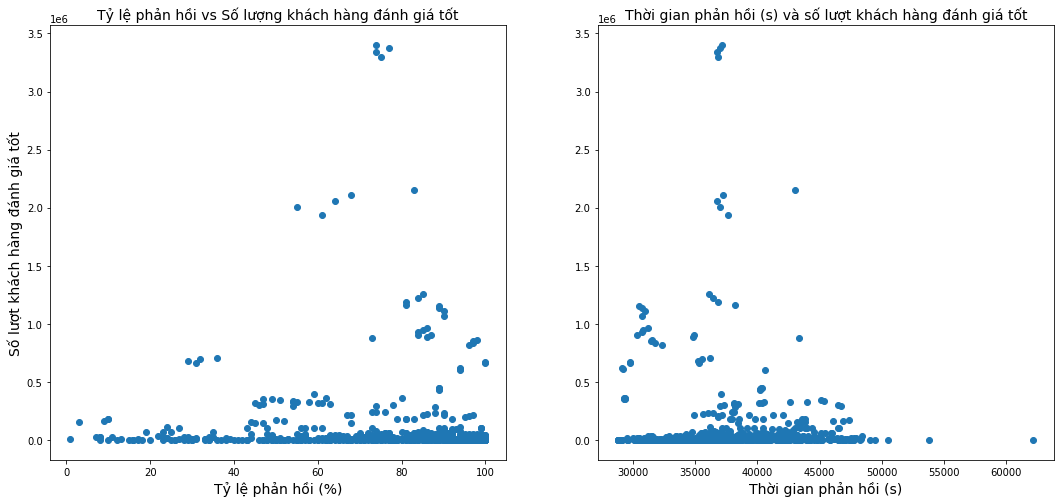

In [14]:
# Chia đồ thị thành 6 phần
fig, ax = plt.subplots(1, 2)
fig.set_figheight(8)
fig.set_figwidth(18)

# Vẽ biểu đồ thể hiện mối quan hệ giữa tỷ lệ phản hồi với số lượt khách hàng đánh giá tốt
ax[0].scatter(df3.response_rate, df3.rating_good)
ax[0].set_title("Tỷ lệ phản hồi vs Số lượng khách hàng đánh giá tốt", fontsize = 14)
ax[0].set_xlabel("Tỷ lệ phản hồi (%)", fontsize = 14)
ax[0].set_ylabel("Số lượt khách hàng đánh giá tốt", fontsize = 14)

# Vẽ biểu đồ thể hiện mối quan hệ giữa thời gian phản hồi (đơn vị giây) với số lượng khách hàng đánh giá tốt
ax[1].scatter(df4.total_seconds, df4.rating_good)
ax[1].set_title("Thời gian phản hồi (s) và số lượt khách hàng đánh giá tốt", fontsize = 14)
ax[1].set_xlabel("Thời gian phản hồi (s)", fontsize = 14)

plt.show()

# 4. Vẽ biểu đồ thể hiện phân bố của điểm đánh giá trung bình.

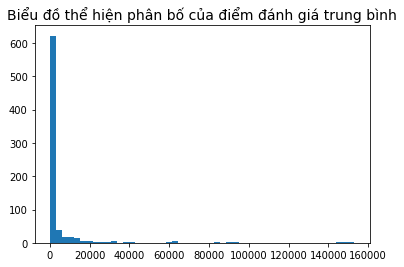

In [15]:
plt.hist(df.rating_normal, bins = 50)
plt.title("Biểu đồ thể hiện phân bố của điểm đánh giá trung bình", fontsize = 14)
plt.show()